In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the "loan_old.csv" dataset.

In [ ]:
df_old = pd.read_csv('loan_old.csv')

In [ ]:
df_old.head()

,Loan_ID,Gender,Married,Dependents,Education,Income,Coapplicant_Income,Loan_Tenor,Credit_History,Property_Area,Max_Loan_Amount,Loan_Status
0,LP001002,Male,No,0,Graduate,5849,0.0,144.0,1.0,Urban,NaN,Y
1,LP001003,Male,Yes,1,Graduate,4583,1508.0,144.0,1.0,Rural,236.99,N
2,LP001005,Male,Yes,0,Graduate,3000,0.0,144.0,1.0,Urban,81.20,Y
3,LP001006,Male,Yes,0,Not Graduate,2583,2358.0,144.0,1.0,Urban,179.03,Y
4,LP001008,Male,No,0,Graduate,6000,0.0,144.0,1.0,Urban,232.40,Y


In [ ]:
df_old.shape

(614, 12)

# Perform analysis on the dataset

In [ ]:
df_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             614 non-null    object 
 1   Gender              601 non-null    object 
 2   Married             611 non-null    object 
 3   Dependents          599 non-null    object 
 4   Education           614 non-null    object 
 5   Income              614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Tenor          599 non-null    float64
 8   Credit_History      564 non-null    float64
 9   Property_Area       614 non-null    object 
 10  Max_Loan_Amount     589 non-null    float64
 11  Loan_Status         614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [ ]:
df_old.describe()

,Income,Coapplicant_Income,Loan_Tenor,Credit_History,Max_Loan_Amount
count,614.000000,614.000000,599.000000,564.000000,589.000000
mean,5403.459283,1621.245798,137.689482,0.842199,230.499474
std,6109.041673,2926.248369,23.366294,0.364878,161.976967
min,150.000000,0.000000,12.000000,0.000000,12.830000
25%,2877.500000,0.000000,144.000000,1.000000,123.990000
50%,3812.500000,1188.500000,144.000000,1.000000,190.370000
75%,5795.000000,2297.250000,144.000000,1.000000,276.500000
max,81000.000000,41667.000000,192.000000,1.000000,990.490000


check whether there are missing values

In [ ]:
df_old.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Income,0
Coapplicant_Income,0
Loan_Tenor,15
Credit_History,50
Property_Area,0


we have nulls values in this columns (Gender, Married, Dependents, Loan_Tenor, Credit_History, Max_Loan_Amount)

In [ ]:
df_old.duplicated().sum()

0

check the type of each feature (categorical or numerical)

In [ ]:
df_old.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Income,int64
Coapplicant_Income,float64
Loan_Tenor,float64
Credit_History,float64
Property_Area,object


check whether numerical features have the same scale

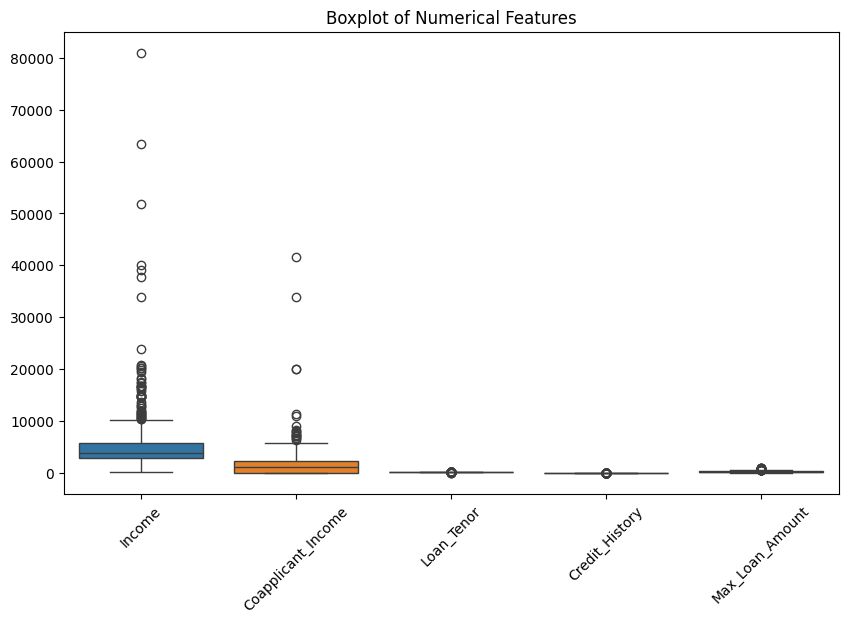

In [ ]:
# Identify numerical features
numerical_features = df_old.select_dtypes(include=np.number).columns

# Visualization to compare scales (optional)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_old[numerical_features])
plt.xticks(rotation=45)
plt.title('Boxplot of Numerical Features')
plt.show()

-> have different scale ❌

visualize a pairplot between numercial columns

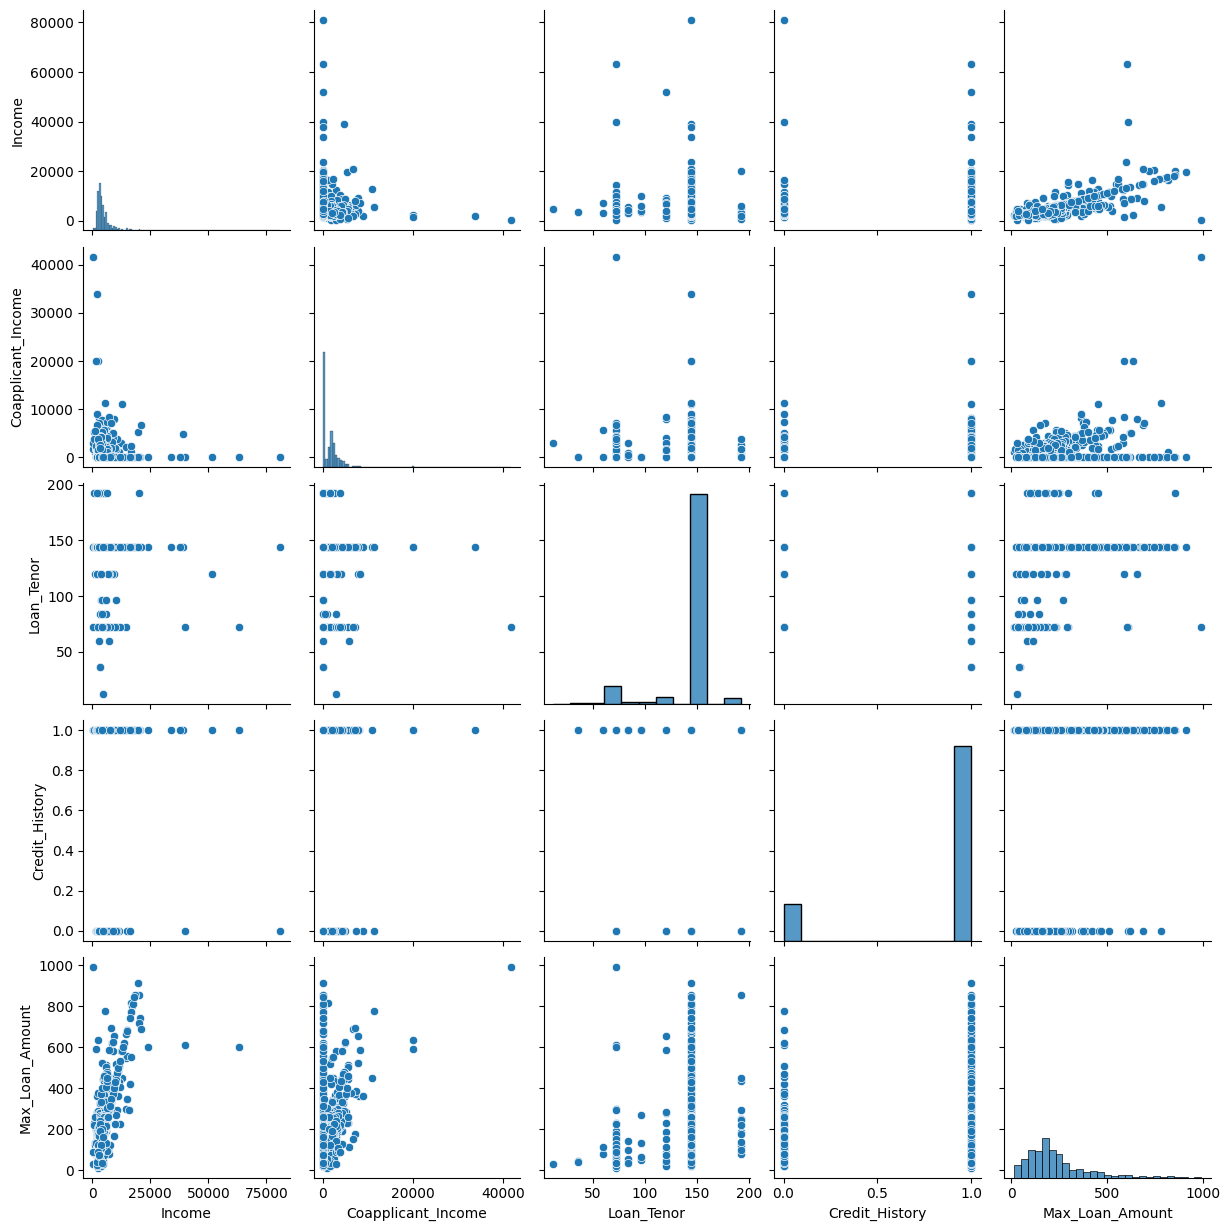

In [ ]:
sns.pairplot(df_old[numerical_features])
plt.show()

# Preprocess the data such that

records containing missing values are removed

In [ ]:
df_old.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Income,0
Coapplicant_Income,0
Loan_Tenor,15
Credit_History,50
Property_Area,0


In [ ]:
df_old.dropna(inplace= True)

In [ ]:
df_old.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Income,0
Coapplicant_Income,0
Loan_Tenor,0
Credit_History,0
Property_Area,0


In [ ]:
df_old.shape

(513, 12)

In [ ]:
df_old.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Income,int64
Coapplicant_Income,float64
Loan_Tenor,float64
Credit_History,float64
Property_Area,object


In [ ]:
df_old.head()

,Loan_ID,Gender,Married,Dependents,Education,Income,Coapplicant_Income,Loan_Tenor,Credit_History,Property_Area,Max_Loan_Amount,Loan_Status
1,LP001003,Male,Yes,1,Graduate,4583,1508.0,144.0,1.0,Rural,236.99,N
2,LP001005,Male,Yes,0,Graduate,3000,0.0,144.0,1.0,Urban,81.20,Y
3,LP001006,Male,Yes,0,Not Graduate,2583,2358.0,144.0,1.0,Urban,179.03,Y
4,LP001008,Male,No,0,Graduate,6000,0.0,144.0,1.0,Urban,232.40,Y
5,LP001011,Male,Yes,2,Graduate,5417,4196.0,144.0,1.0,Urban,414.50,Y


the features and targets are separated


In [ ]:
# Assuming 'Loan_Status' is your target variable
# X contains your features and y contains your target variable.
df_old = df_old.drop('Loan_ID', axis=1)
X = df_old.drop(['Loan_Status','Max_Loan_Amount'], axis=1).copy()
#y_linear = df_old['Max_Loan_Amount']
#y_class = df_old['Loan_Status']
y = df_old[['Max_Loan_Amount','Loan_Status']].copy()
print(X.head())

  Gender Married Dependents     Education  Income  Coapplicant_Income  \
1   Male     Yes          1      Graduate    4583              1508.0   
2   Male     Yes          0      Graduate    3000                 0.0   
3   Male     Yes          0  Not Graduate    2583              2358.0   
4   Male      No          0      Graduate    6000                 0.0   
5   Male     Yes          2      Graduate    5417              4196.0   

   Loan_Tenor  Credit_History Property_Area  
1       144.0             1.0         Rural  
2       144.0             1.0         Urban  
3       144.0             1.0         Urban  
4       144.0             1.0         Urban  
5       144.0             1.0         Urban  


 the data is shuffled and split into training and testing sets:

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(410, 9) (103, 9)
(410, 2) (103, 2)


categorical features are encoded

categorical targets are encoded

In [ ]:
categorical_features = df_old.select_dtypes(include=['object']).columns
categorical_features

Index(['Gender', 'Married', 'Dependents', 'Education', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [ ]:
for feature in categorical_features:
    print(f"Unique values in {feature}:")
    print(df_old[feature].unique())
    print()

Unique values in Gender:
['Male' 'Female']

Unique values in Married:
['Yes' 'No']

Unique values in Dependents:
['1' '0' '2' '3+']

Unique values in Education:
['Graduate' 'Not Graduate']

Unique values in Property_Area:
['Rural' 'Urban' 'Semiurban']

Unique values in Loan_Status:
['N' 'Y']



In [ ]:
X_train.head()

,Gender,Married,Dependents,Education,Income,Coapplicant_Income,Loan_Tenor,Credit_History,Property_Area
385,Male,No,1,Graduate,3667,0.0,72.0,1.0,Urban
396,Female,No,0,Graduate,3180,0.0,144.0,0.0,Urban
210,Female,No,0,Graduate,10000,0.0,144.0,1.0,Semiurban
327,Male,Yes,0,Graduate,5818,2160.0,144.0,1.0,Semiurban
590,Male,Yes,0,Graduate,3000,3416.0,72.0,1.0,Semiurban


In [ ]:
from sklearn.preprocessing import OneHotEncoder

X_train_categorical = X_train.select_dtypes(include=['object'])
X_test_categorical = X_test.select_dtypes(include=['object'])

print(X_train_categorical.head())
print('-------------------------')
print(X_test_categorical.head())

     Gender Married Dependents Education Property_Area
385    Male      No          1  Graduate         Urban
396  Female      No          0  Graduate         Urban
210  Female      No          0  Graduate     Semiurban
327    Male     Yes          0  Graduate     Semiurban
590    Male     Yes          0  Graduate     Semiurban
-------------------------
     Gender Married Dependents     Education Property_Area
366    Male      No          0      Graduate     Semiurban
595    Male      No          0  Not Graduate         Rural
527    Male     Yes          1  Not Graduate     Semiurban
184  Female     Yes          0      Graduate     Semiurban
598    Male     Yes          0      Graduate         Rural


In [ ]:
encoding = OneHotEncoder(drop='first', sparse_output= False).set_output(transform='pandas')

X_train_categorical = encoding.fit_transform(X_train_categorical)
X_test_categorical = encoding.transform(X_test_categorical)

In [ ]:
X_train_categorical.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
385,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
210,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
327,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
590,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
if 'Loan_Status' in categorical_features:
    categorical_features = categorical_features.drop('Loan_Status')

# Now proceed with dropping the remaining categorical columns
X_train.drop(columns=categorical_features, inplace=True)
X_test.drop(columns=categorical_features, inplace=True)

 numerical features are standardized

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features in the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the numerical features in the testing set using the same scaler
X_test_scaled = scaler.transform(X_test)

# Fit a linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train_scaled, y_train['Max_Loan_Amount'])
y_pred = lr.predict(X_test_scaled)

# Evaluate the linear regression model using sklearn's R2 score.

In [ ]:
r2 = r2_score(y_test['Max_Loan_Amount'], y_pred)
print(f"R^2 Score: {r2}")

R^2 Score: -0.2765185412134745


# Fit a logistic regression model -> Implement logistic regression from scratch using gradient descent.

In [ ]:
class LogisticRegressionScratch_GD:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate #learning_rate
        self.epochs = epochs # epochs
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))


    def fit(self, X, y):
        n_samples, n_features = X.shape
        #intialize weights and bais
        self.weights = np.zeros(n_features)
        self.bias = 0

        #gradient descent
        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i >= 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)


In [ ]:
y_train['Loan_Status'] = y_train['Loan_Status'].map({'Y': 1, 'N': 0})
y_test['Loan_Status'] = y_test['Loan_Status'].map({'Y': 1, 'N': 0})

In [ ]:
lr_scratch = LogisticRegressionScratch_GD(learning_rate=0.01, epochs=1000)

lr_scratch.fit(X_train_scaled, y_train['Loan_Status'])
lr_scratch_pred = lr_scratch.predict(X_test_scaled)
print(lr_scratch_pred)

[1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1]


# a function (from scratch) to calculate the accuracy of the model

In [ ]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [ ]:
accuracy_scratch = accuracy(y_test['Loan_Status'], lr_scratch_pred)
print(f"Accuracy: {accuracy_scratch}")

Accuracy: 0.8058252427184466


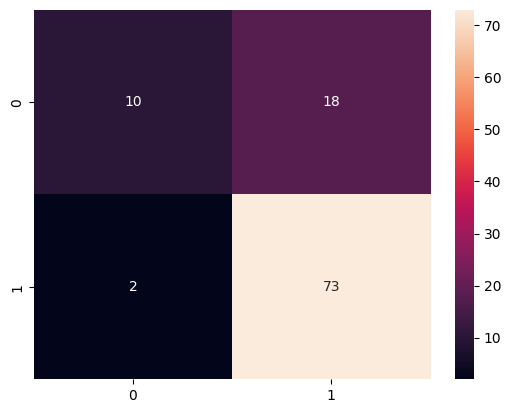

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test['Loan_Status'], lr_scratch_pred)
sns.heatmap(confusion_matrix(y_test['Loan_Status'], lr_scratch_pred), annot=True, fmt='d')
plt.show()

# Load the "loan_new.csv" dataset

In [ ]:
df_new = pd.read_csv('loan_new.csv')

In [ ]:
df_new.head()

,Loan_ID,Gender,Married,Dependents,Education,Income,Coapplicant_Income,Loan_Tenor,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,5720,0,144.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,3076,1500,144.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,5000,1800,144.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,2340,2546,144.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,3276,0,144.0,1.0,Urban


In [ ]:
df_new.shape

(367, 10)

#  Perform analysis on the dataset

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             367 non-null    object 
 1   Gender              356 non-null    object 
 2   Married             367 non-null    object 
 3   Dependents          357 non-null    object 
 4   Education           367 non-null    object 
 5   Income              367 non-null    int64  
 6   Coapplicant_Income  367 non-null    int64  
 7   Loan_Tenor          360 non-null    float64
 8   Credit_History      338 non-null    float64
 9   Property_Area       367 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 28.8+ KB


In [ ]:
df_new.describe()

,Income,Coapplicant_Income,Loan_Tenor,Credit_History
count,367.000000,367.000000,360.000000,338.000000
mean,4805.599455,1569.577657,138.188889,0.825444
std,4910.685399,2334.232099,22.460560,0.380150
min,0.000000,0.000000,12.000000,0.000000
25%,2864.000000,0.000000,144.000000,1.000000
50%,3786.000000,1025.000000,144.000000,1.000000
75%,5060.000000,2430.500000,144.000000,1.000000
max,72529.000000,24000.000000,192.000000,1.000000


 check whether there are missing values

In [ ]:
df_new.isnull().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Income,0
Coapplicant_Income,0
Loan_Tenor,7
Credit_History,29
Property_Area,0


 check the type of each feature (categorical or numerical)


In [ ]:
df_new.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Income,int64
Coapplicant_Income,int64
Loan_Tenor,float64
Credit_History,float64
Property_Area,object


check whether numerical features have the same scale


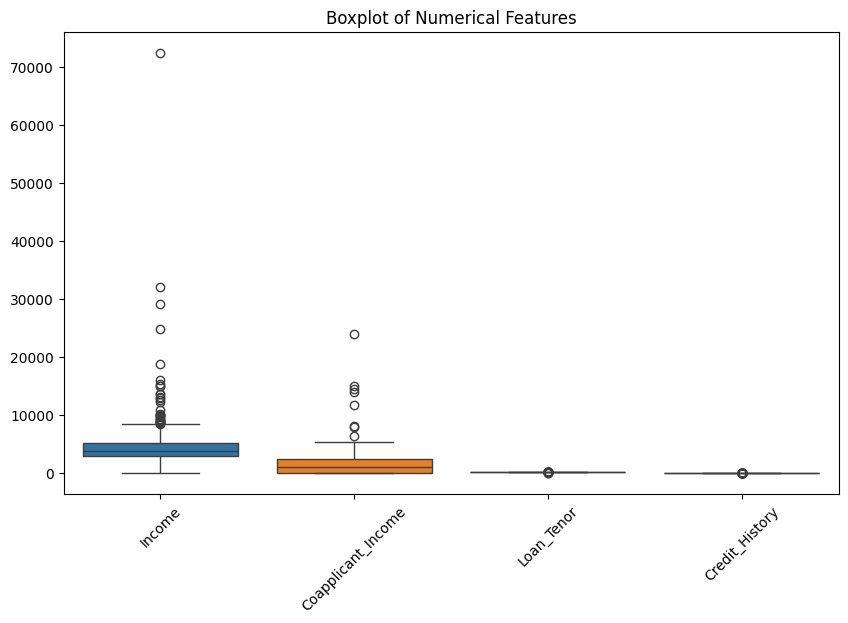

In [ ]:
numerical_features_new = df_new.select_dtypes(include=np.number).columns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_new[numerical_features_new])
plt.xticks(rotation=45)
plt.title('Boxplot of Numerical Features')
plt.show()

-> have a different scale ❌

 visualize a pairplot between numercial columns

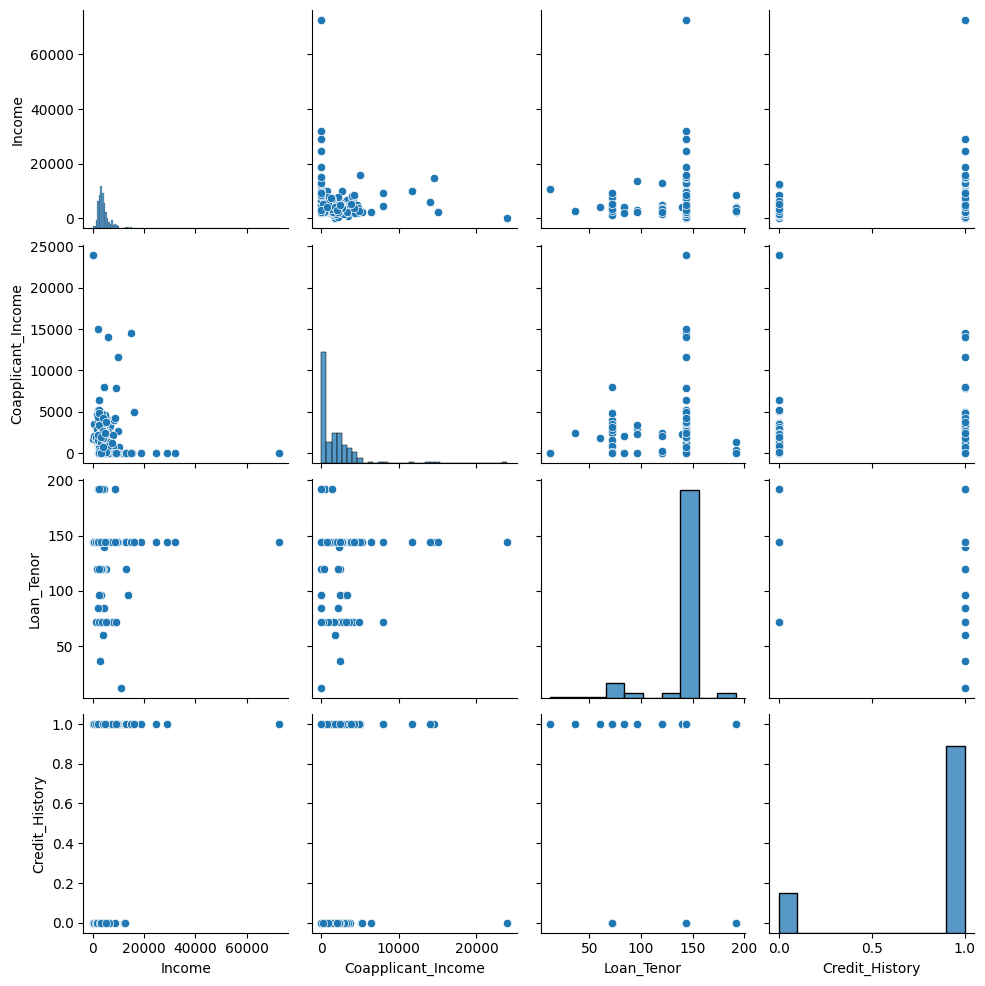

In [ ]:
sns.pairplot(df_new[numerical_features_new])
plt.show()

# Preprocess the data such

records containing missing values are removed

In [ ]:
df_new.dropna(inplace= True)

In [ ]:
df_new.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Income,0
Coapplicant_Income,0
Loan_Tenor,0
Credit_History,0
Property_Area,0


categorical features are encoded

In [ ]:
df_new.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Income,int64
Coapplicant_Income,int64
Loan_Tenor,float64
Credit_History,float64
Property_Area,object


In [ ]:
categorical_features_new = df_new.select_dtypes(include=['object']).columns
categorical_features_new

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Property_Area'],
      dtype='object')

In [ ]:
for categorical_features in categorical_features_new:
    print(f"Unique values in {categorical_features}:")
    print(df_new[categorical_features].unique())
    print()

Unique values in Loan_ID:
['LP001015' 'LP001022' 'LP001031' 'LP001051' 'LP001054' 'LP001055'
 'LP001056' 'LP001059' 'LP001067' 'LP001078' 'LP001082' 'LP001094'
 'LP001096' 'LP001099' 'LP001105' 'LP001107' 'LP001108' 'LP001115'
 'LP001121' 'LP001124' 'LP001135' 'LP001149' 'LP001153' 'LP001169'
 'LP001176' 'LP001177' 'LP001183' 'LP001185' 'LP001187' 'LP001190'
 'LP001203' 'LP001208' 'LP001210' 'LP001211' 'LP001219' 'LP001220'
 'LP001221' 'LP001226' 'LP001230' 'LP001231' 'LP001242' 'LP001270'
 'LP001284' 'LP001291' 'LP001298' 'LP001312' 'LP001313' 'LP001317'
 'LP001321' 'LP001323' 'LP001324' 'LP001332' 'LP001335' 'LP001338'
 'LP001347' 'LP001348' 'LP001351' 'LP001352' 'LP001358' 'LP001359'
 'LP001361' 'LP001368' 'LP001375' 'LP001380' 'LP001386' 'LP001400'
 'LP001407' 'LP001413' 'LP001415' 'LP001419' 'LP001420' 'LP001428'
 'LP001445' 'LP001446' 'LP001450' 'LP001452' 'LP001455' 'LP001466'
 'LP001471' 'LP001472' 'LP001483' 'LP001486' 'LP001490' 'LP001496'
 'LP001499' 'LP001500' 'LP001501' 'L

In [ ]:
df_new = df_new.drop('Loan_ID', axis=1)

In [ ]:
encoding = OneHotEncoder(drop='first', sparse_output= False).set_output(transform='pandas')

X_new_categorical = df_new.select_dtypes(include=['object'])
X_new_categorical = encoding.fit_transform(X_new_categorical)

In [ ]:
X_new_categorical.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


 numerical features are standardized

In [ ]:
scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(df_new[numerical_features_new])

# Use your models on this data to predict the loan amounts and status

In [ ]:
Loan_amount_new = lr.predict(X_new_scaled)
print("Predicted Loan Amounts:", Loan_amount_new)

Predicted Loan Amounts: [ 2.27952372e+02  1.95258181e+02  2.60328379e+02  1.56600250e+02
  2.25677059e+02  1.25945697e+02  1.59210928e+02  3.64085740e+02
  2.02220624e+02  1.51199210e+02  1.69720237e+02  4.01294314e+02
  1.97181040e+02  2.26405047e+02  2.81259831e+02  1.81367915e+02
  5.65134323e+02  5.95196715e+01  1.64134495e+02 -2.05569366e+01
  1.70876514e+02  3.48540960e+02  7.57856152e+02  3.91161371e+02
  7.51824738e+01  1.33302790e+02  2.67750591e+02  2.06292206e+02
  2.22538932e+02  1.86664972e+02  1.37869520e+02  2.52730796e+02
  2.09966235e+02  2.31251386e+02  2.25546347e+02  2.49561283e+02
  1.67343941e+02  1.72090108e+02  3.27852274e+02  1.67986227e+02
  1.86163083e+02  3.01932694e+02  1.82217760e+02  2.54417849e+02
  6.84607127e+01  2.15486187e+02  1.26191595e+02  1.89473609e+02
  1.29094130e+02  2.35729323e+02  5.64297840e+01  1.82516285e+02
  2.74450911e+02  2.05997873e+02  1.51741055e+02  1.92042753e+02
  2.52407558e+02  1.83121480e+02  1.46481990e+02  2.84765477e+02
 

In [ ]:
df_new['Max_Loan_Amount'] = Loan_amount_new

In [ ]:
loan_status_new = lr_scratch.predict(X_new_scaled)
print("Predicted Loan Status:", loan_status_new)

Predicted Loan Status: [1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]


In [ ]:
df_new['Loan_Status'] = loan_status_new

In [64]:
df_new.head()

,Gender,Married,Dependents,Education,Income,Coapplicant_Income,Loan_Tenor,Credit_History,Property_Area,Max_Loan_Amount,Loan_Status
0,Male,Yes,0,Graduate,5720,0,144.0,1.0,Urban,227.952372,1
1,Male,Yes,1,Graduate,3076,1500,144.0,1.0,Urban,195.258181,1
2,Male,Yes,2,Graduate,5000,1800,144.0,1.0,Urban,260.328379,1
4,Male,No,0,Not Graduate,3276,0,144.0,1.0,Urban,156.600250,1
5,Male,Yes,0,Not Graduate,2165,3422,144.0,1.0,Urban,225.677059,1
